In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as TTS ,cross_val_score as CSV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn

Text(0.5, 15.0, 'Predict Value')

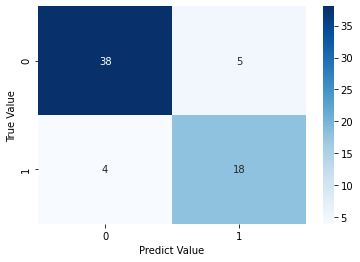

In [3]:
df =pd.read_csv('XGB_Gain_data.csv')
N =11
X = df.iloc[:,1:N]
y = df.iloc[:,15]

X_train,X_test,y_train,y_test = TTS (
        X,y,test_size = 0.15,random_state =29,stratify = y)
GBC = XGBClassifier(colsample_bytree=0.7, gamma=0.4, learning_rate=0.4, max_depth=8, 
                    min_child_weight=1, n_estimators=26, subsample=0.4)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X)
con=confusion_matrix(y,y_pred)
con = pd.DataFrame(con)
shp = sn.heatmap(con,annot=True,cmap='Blues')
shp.set_ylabel('True Value')
shp.set_xlabel('Predict Value')